# Análisis Exploratorio y Reducción de la Dimensionalidad


## Análisis de Componentes Principales

El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

### Enfoque basado en proyecciones ortogonales

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:

$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio.

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


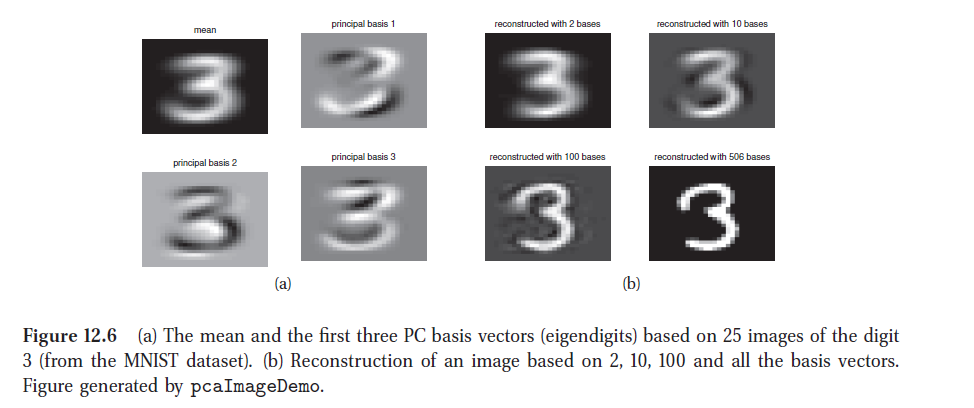

In [1]:
suppressMessages(library("IRdisplay"))
display_png(file="figura1.png")

### Enfoque de Descomposición en Valores Singulares (SVD)
Otro enfoque posible es considerar la descomposición siguiente para la matriz $X$.
Supongamos que $n>d$, entonces existen matrices U, S, V tales que:

$$
\begin{matrix}
X & =  & U& S & V^T\\
&&&&\\
\begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
&...&\\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix} & = &
\begin{pmatrix}
u_{11} &...& u_{1d} \\
&...&\\
&...&\\
&...&\\
u_{n1}&...& u_{nd} \\
\end{pmatrix} 
&
\begin{pmatrix}
\sigma_{1} &...& 0 \\
&...&\\
0 &...& \sigma_{d} \\
\end{pmatrix}
&
\begin{pmatrix}
v_{11} &...& v_{d1} \\
&...&\\
v_{1d}&...& v_{dd} \\
\end{pmatrix}
\end{matrix}$$

tales que $U$ tiene columnas ortonormales, es decir $U^TU = I_{dxd}$ y $V$ con filas y columnas ortonormales, i.e., $V^TV= VV^T= I_{dxd}$, y $S$ es una matriz diagonal conteniendo los valores singulares $\sigma_1,...,\sigma_d$.

Con esto, resulta que

$$X^TX = (USV^T)^T(USV^T) = VS^TU^TUSV^T= VS^TSV^T = VDV^T$$

donde $D$ es la matriz diagonal que contiene los cuadrados de los valores singulares ${\sigma_1}^2,...,{\sigma_d}^2$. Y entonces:

$$X^TX V = VD$$

Es decir $V$ es la matriz de los vectores propios de $\Sigma$ y ${\sigma_i}^2, i=1,...,d$ los valores propios respectivos.

Por otra parte:

$$XX^T = (USV^T)(USV^T)^T = USV^TVS^TU^T=USS^TU^T = UDU^T$$

con lo cual

$$XX^T U = UD$$
Es decir $U$ es la matriz de vectores propios de $XX^T$  y ${\sigma_i}^2, i=1,...,d$ los valores propios respectivos.


**Ejemplo Ilustrativo:**

Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [2]:
data("USArrests")
head(USArrests, 10)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


**Preparando los datos:**

Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

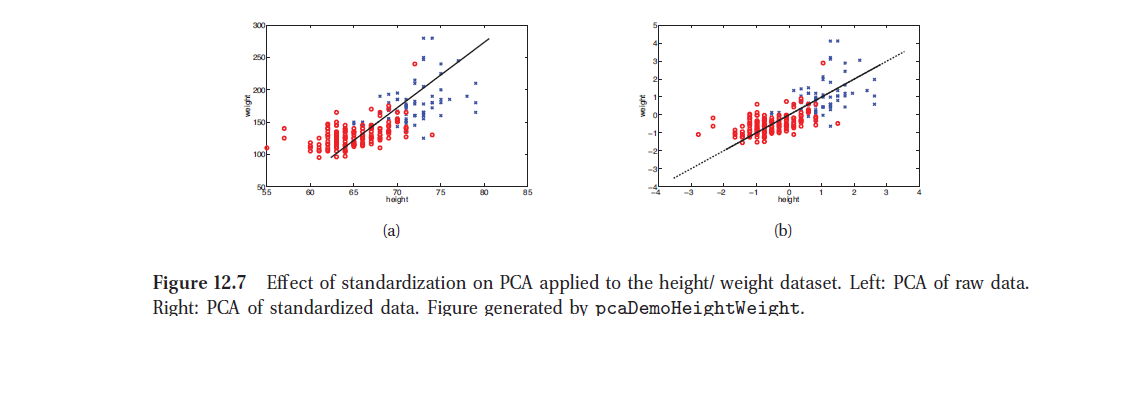

In [3]:
display_png(file="figura2.png")

In [4]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)


Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Una posibilidad es estandarizar las variables:

In [5]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, no siempre el escalado  deseable. Un ejemplo sería si cada variable en el conjunto de datos tuviera las mismas unidades y el analista deseara capturar esta diferencia en la varianza para sus resultados. Dado que Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, esto puede ser razonable dependiendo de cómo quiera interpretar los resultados. Pero como UrbanPop se mide como un porcentaje de la población total, no tendría sentido comparar la variabilidad de UrbanPop con el asesinato, el asalto y la violación.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA también dependerán de si las variables se han escalado individualmente.

El objetivo del PCA es explicar la mayor parte de la variabilidad en los datos con un número menor de variables que el conjunto de datos original. Para un conjunto de datos de gran tamaño con p variables, podríamos examinar las gráficas por pares de cada variable contra cada otra variable, pero incluso para un p moderado, el número de gráficos se vuelve excesivo y no es útil. Por ejemplo, cuando $p = 10$ hay $p (p − 1)/2 = 45$ diagramas de dispersión que podrían analizarse. Claramente, se requiere un método mejor para visualizar las n observaciones cuando p es grande. En particular, nos gustaría encontrar una representación de baja dimensión de los datos que capturen la mayor cantidad de información posible. Por ejemplo, si podemos obtener una representación bidimensional de los datos que capturan la mayor parte de la información, entonces podemos  proyectar las observaciones en este espacio de baja dimensión.

PCA proporciona una herramienta para hacer precisamente esto. Encuentra una representación de baja dimensión de un conjunto de datos que contiene la mayor cantidad de variación posible. La idea es que cada una de las $n$ observaciones vive en el espacio p-dimensional, pero no todas estas dimensiones son igualmente interesantes. PCA busca un pequeño número de dimensiones que sean lo más interesantes posible, donde el concepto de interesante se mide por la cantidad de observaciones que varían a lo largo de cada dimensión. Cada una de las dimensiones encontradas por PCA es una combinación lineal de las características p y podemos tomar estas combinaciones lineales de las mediciones y reducir el número de gráficos necesarios para el análisis visual mientras retenemos la mayor parte de la información presente en los datos.


In [6]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [7]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [8]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


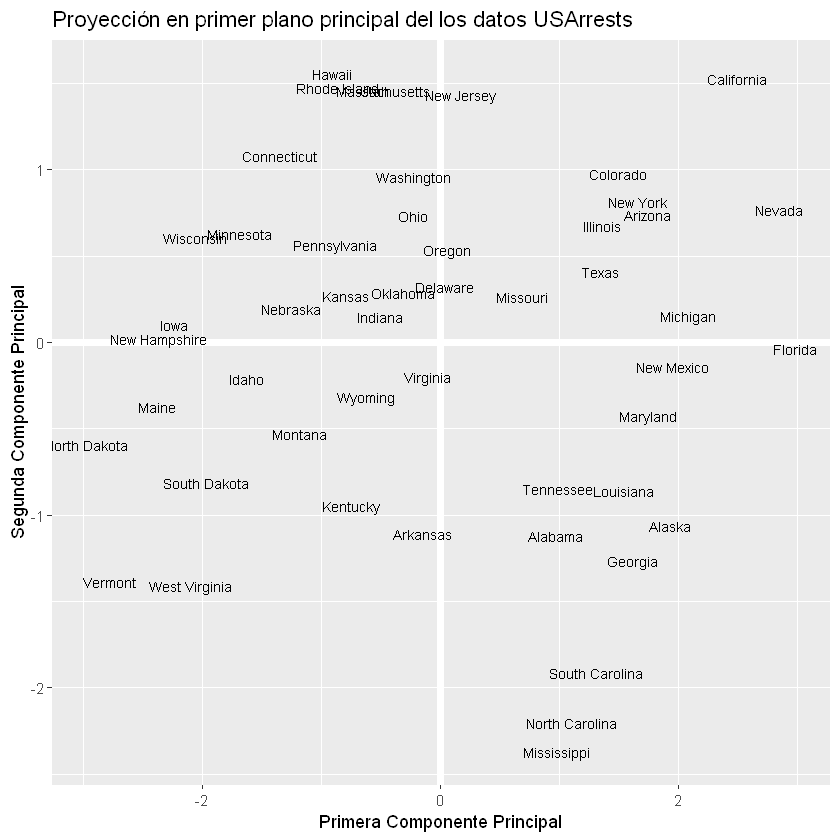

In [9]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

### Selección del número de componentes principales

Como ya se ha mencionado el PCA reduce la dimensionalidad al mismo tiempo que explica la mayor parte de la variabilidad, pero existe un método más técnico para medir exactamente qué porcentaje de la varianza se mantuvo en estos componentes principales.

La proporción de varianza explicada (PVE) por la m-ésima componente principal se calcula utilizando la ecuación:

$$PVE = \frac{\sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{\sum_{i=1}^n \sum_{j=1}^d {x_{ij}}^2}$$

De los cálculos previos se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:

$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

In [10]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

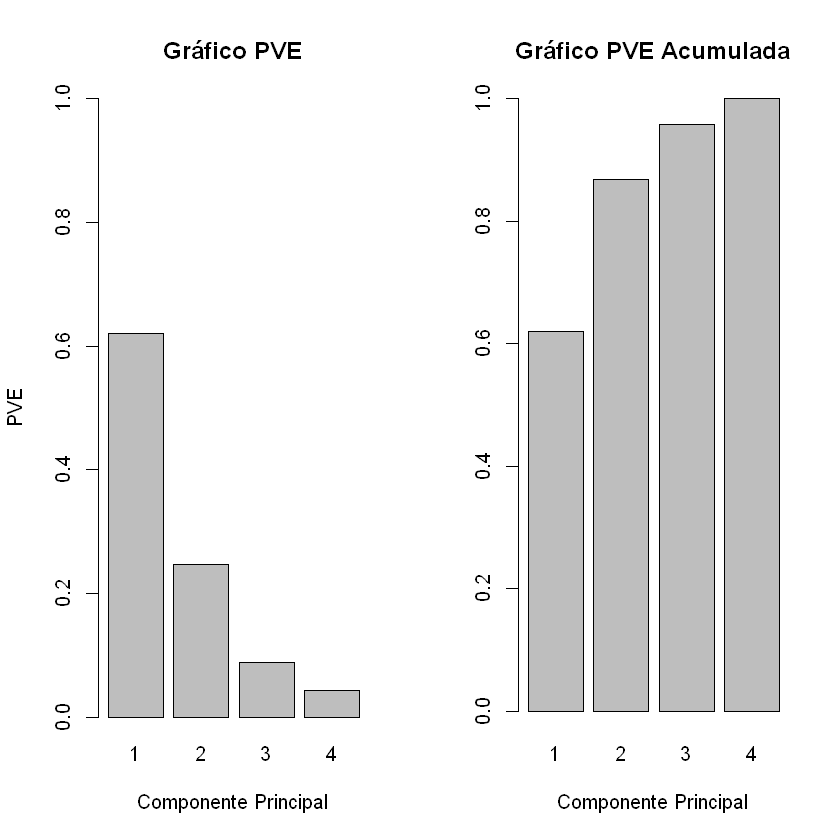

In [11]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


**Número Óptimo de Componentes principales**

En este ejemplo el número óptimo de componentes principales es 2, pues con ellas se conserva e 87% de la varianza.

**Las funciones predefinidas en R:**

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
               PC1        PC2        PC3         PC4
Murder   0.5358995 -0.4181809  0.3412327 -0.64922780
Assault  0.5831836 -0.1879856  0.2681484  0.74340748
UrbanPop 0.2781909  0.8728062  0.3780158 -0.13387773
Rape     0.5434321  0.1673186 -0.8177779 -0.08902432


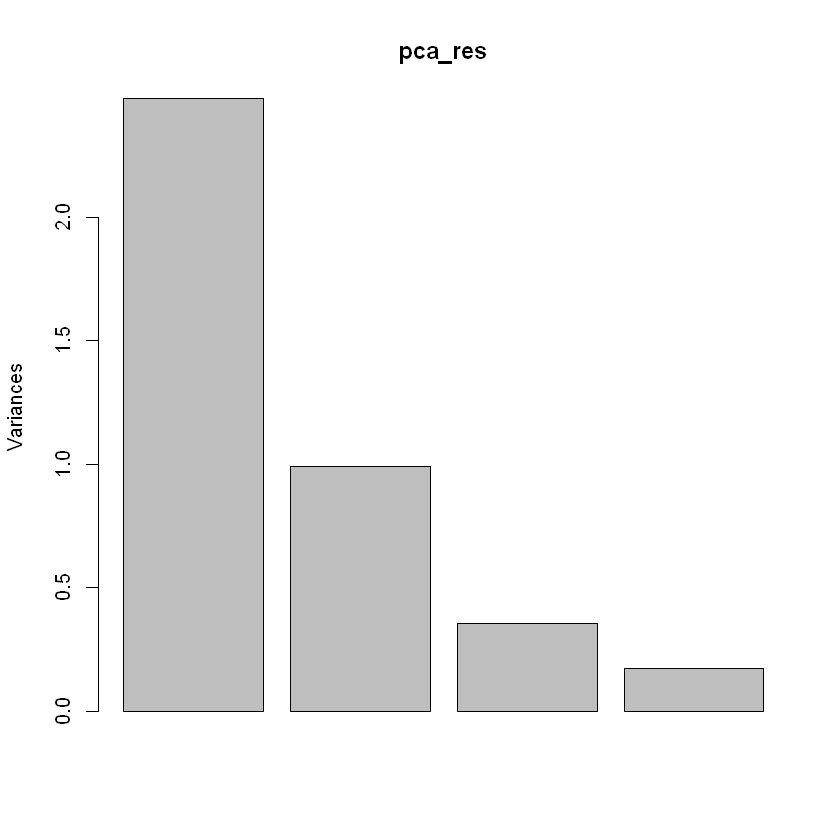

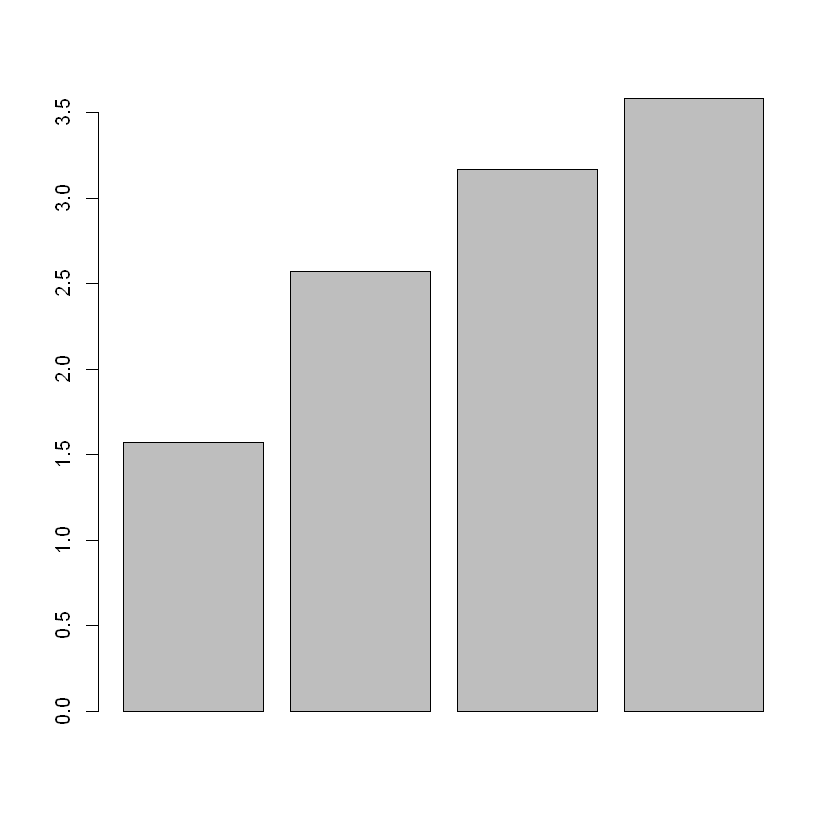

In [12]:

datos <- as.matrix(USArrests)
pca_res <- prcomp(datos,scale=TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x
print(pca_res)
plot(pca_res)
barplot(cumsum(pca_res$sdev))


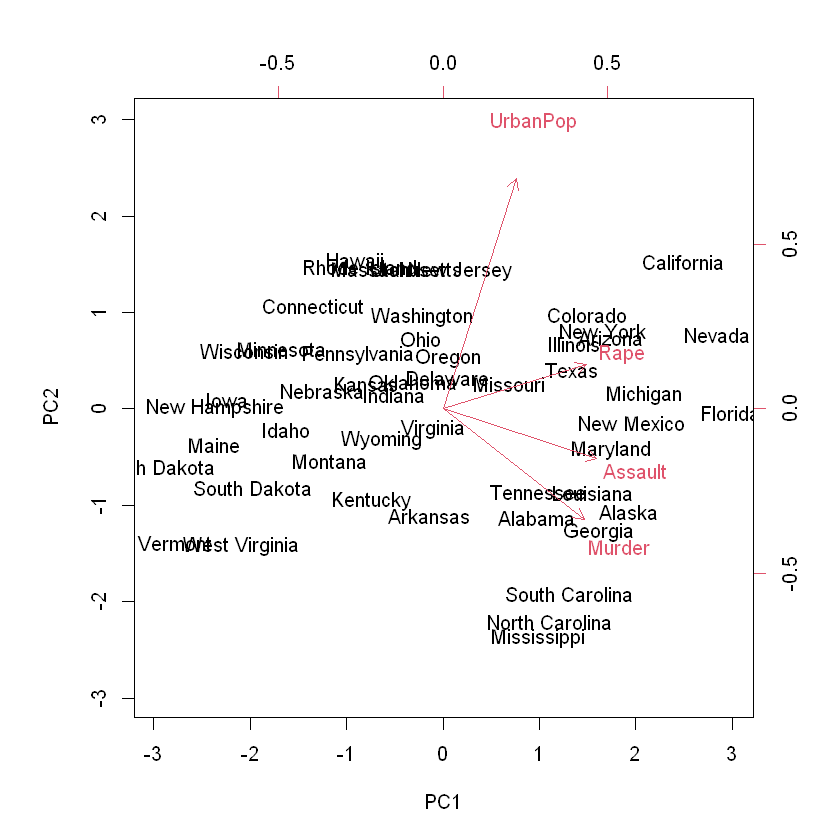

In [13]:
biplot(pca_res, scale = 0)

#### Ejercicio 2:

a) Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp

b) Explique como se relacionan variables y observaciones en este último gráfico.
Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 

In [14]:
## recuperando los datos originales o una aproximación de ellos
print(datos)
pca_res <- prcomp(datos)
print(dim(datos))
#proyección en el primer plano principal
pr = pca_res$rotation[,1:4]
print(pr)
pr_datos <- datos%*%pr
print(pr_datos)
#volviendo al espacio original
rec <- pr_datos%*%t(pr)
print(rec)

               Murder Assault UrbanPop Rape
Alabama          13.2     236       58 21.2
Alaska           10.0     263       48 44.5
Arizona           8.1     294       80 31.0
Arkansas          8.8     190       50 19.5
California        9.0     276       91 40.6
Colorado          7.9     204       78 38.7
Connecticut       3.3     110       77 11.1
Delaware          5.9     238       72 15.8
Florida          15.4     335       80 31.9
Georgia          17.4     211       60 25.8
Hawaii            5.3      46       83 20.2
Idaho             2.6     120       54 14.2
Illinois         10.4     249       83 24.0
Indiana           7.2     113       65 21.0
Iowa              2.2      56       57 11.3
Kansas            6.0     115       66 18.0
Kentucky          9.7     109       52 16.3
Louisiana        15.4     249       66 22.2
Maine             2.1      83       51  7.8
Maryland         11.3     300       67 27.8
Massachusetts     4.4     149       85 16.3
Michigan         12.1     255   

**Volviendo al ejemplo de los dígitos:**

In [15]:
mnist <- read.csv("mnist_train.csv",header=FALSE)
#agregando nombres a las columnas
colnames(mnist)[1]<-"Digit"
for(i in seq(2,ncol(mnist),by=1)){colnames(mnist)[i]<-paste("pixel",as.character(i-1),sep = "")}

#selección de datos que representan el Nro 3
datos3 <- mnist[mnist$Digit==3,-1]
print(dim(datos3))


[1] 1431  784


In [16]:
##separando las columnas con sólo 0`s
datos <- matrix(0,nrow=1431,ncol=784)
col0 <- 0
k=0
for (j in 1:784){
   vec <- as.numeric(datos3[,j])
    if(sum(vec)==0)
        col0 <-c(col0,j)
    else{
        k <- k+1
        datos[,k] <- vec  
    }
}
datos <- datos[,1:k]
col0 <- col0[-1]
print(dim(datos))
print(length(col0))

[1] 1431  536
[1] 248


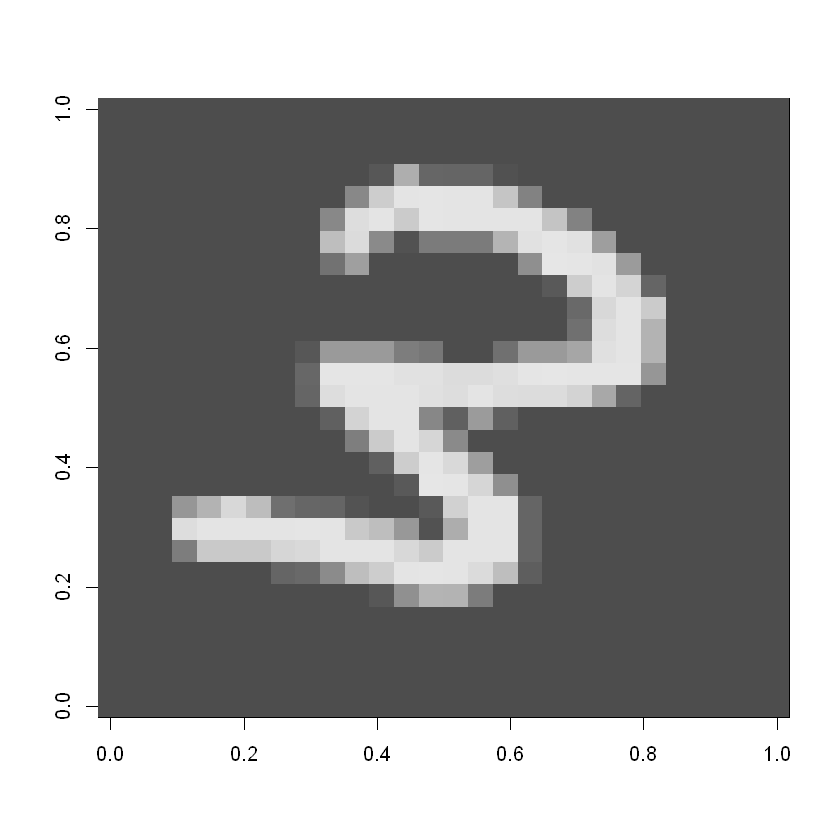

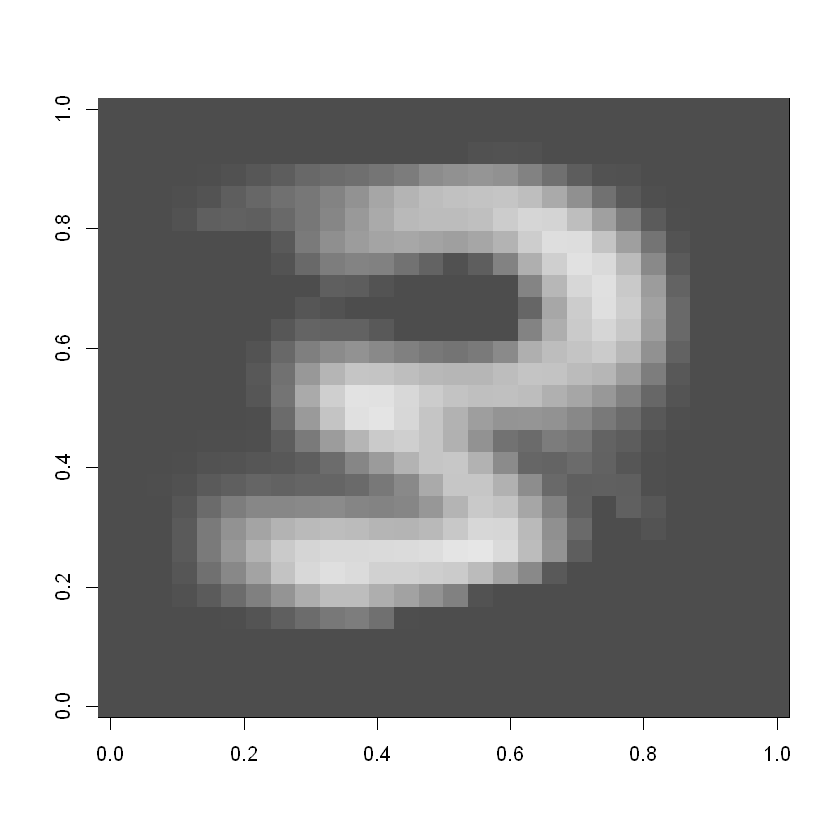

In [21]:
#reducción de dimensiones usando PCA
res <- prcomp(datos)
#utilizando j componentes
j=10
pr = matrix(res$rotation[,1:j],ncol=j,nrow=536)

#proyección en j componentes
pr_datos <- datos%*%pr

#reconstrucción a partir de la proyección en j componentes
rec <- trunc(pr_datos%*%t(pr))
rect <- rec

#truncando al rango de valores de grises
rect[rec[,]<0]<-0
rect[rec[,]>255]<-255

#agregando las columnas con ceros
datosR <- matrix(0,ncol=784,nrow=1431)
k<-1
l<-1
for (j in 1:784){
    if (j!=col0[k]){
       datosR[,j]<-rect[,l]
       l<-l+1
    }
    else
        k <- k+1
}
#comparación de la representación de una observación considerando las 784 variables o j
digit <- matrix(as.numeric(datos3[48,]), nrow = 28)
image(digit, col = grey.colors(255))

digitR <- matrix(as.numeric(datosR[48,]),nrow=28)
image(digitR, col = grey.colors(255))



## Otro enfoque: Modelos Lineales Latentes

### Análisis Factorial

Consideremos que asociado a un vector aleatorio $d$-dimensional $x_i$ existe un vector aleatorio de variables latentes $z_i$ de menor dimension, $l$, que cumple:

$$z_i \sim \mathcal{N}(z_i \mid \mu_0,\Sigma_0)$$

y

$$P(x_i\mid z_i ,\theta) = \mathcal{N}(Wz_i + \mu, \Psi)$$

donde $W$ matriz de dimensiones $dxl$ es conocida como matriz de coeficientes factoriales y $\Psi$ es la matriz de covarianza de dimensión $dxd$


La idea principal del Análisis Factorial es  que $\Psi$ es una matriz diagonal, es decir, que toda la correlación de las variables originales se concentra en las variables latentes.
El caso especial en que:

$$\Psi= \sigma^2 I$$ 

se denomina **Análisis de Componentes Principales Probabilístico (PPCA)**.

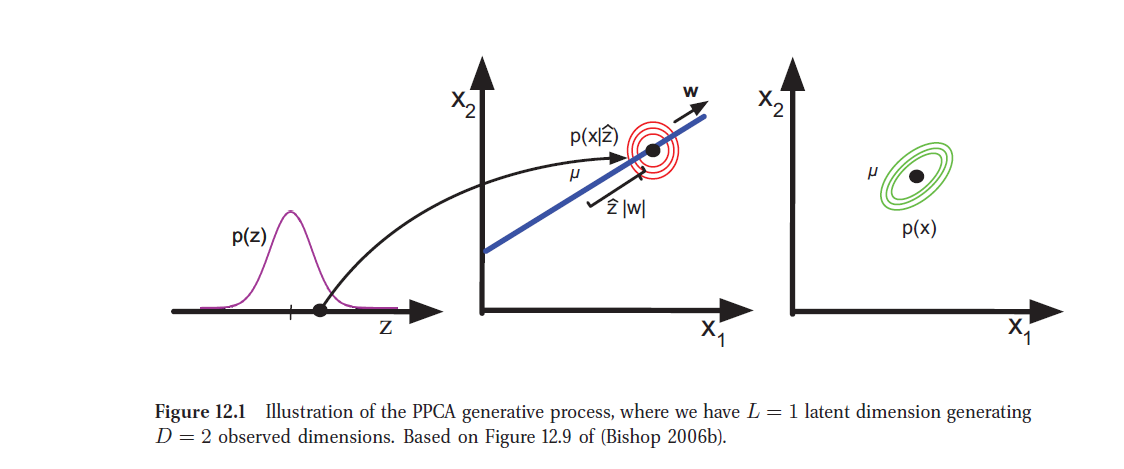

In [18]:
display_png(file="figura3.png")

En este contexto, si agregamos como restricciones que $W$ sea ortonormal y que $\sigma^2 \to 0$, el modelo se reduce al **PCA clásico**.

En efecto, se puede formular el siguiente teorema:

**Teorema 1:** Supongamos que buscamos una base lineal ortogonal de $l$ vectores $w_j \in \mathbb{R}^d$ y las correspondientes variables latentes $z_i \in  \mathbb{R}^l$, tales que se minimice el **error de reconstrucción** medio:

$$J(W,Z) = \frac{1}{n} \sum_{i=1}^n \|x_i-\hat{x_i}\|^2$$

donde

$$ \hat{x_i}= Wz_i$$

Entonces, sujeto a que $W$ es ortonormal, se puede demostrar que la solución óptima es

$$\hat{W} = V_l$$

donde $V_l$ contiene los $l$ vectores propios asociados a los mayores valores propios de la matrix de covarianzas empìricas de $X$:

$$\hat{\Sigma} = \frac{1}{n} \sum_{i=1}^n x_i^T {x_i}$$

Además la codificación óptima de los datos de dimensión $l$ es 

$$\hat{z_i} = W^Tx_i$$

que es la proyección de los datos  en el espacio generado por los primeros $l$ vectores propios  de $\Sigma$.

**Demostración**: ver en Murphy "Machine Learning, a probabilistic approach", Capítulo 12.

En el caso general $\sigma^2 >0$ se tiene el siguiente teorema, que corresponde al PPCA.

**Teorema 2:** Considere el modelo de análisis factorial con $\Psi = \sigma^2 I$. Entonces, se cumple que el log de la verosimilitud observada es:
$$log p(X \mid W, \sigma^2) = \frac{-n}{2} ln |C| - \frac{1}{2}\sum_{i=1}^n {x_i}^T C^{-1} x_i = 
\frac{-n}{2} ln |C| + tr(C^{-1} \hat{\Sigma})$$
donde $$C = WW^T + \sigma^2 I$$ y 
$$\hat{\Sigma} = \frac{1}{n} \sum_{i=1}^n x_i^T {x_i}$$
Se puede mostrar que este caso, los estimadores de máxima verosimilitud de $W$ y $\sigma^2$ están dados por:

$$\hat{W}  = V (\Lambda -\sigma^2I)^{1/2} $$

donde $V$ es la matriz cuyas columnas son los $l$ primeros vectores propios de $\hat{\Sigma}$ y $\Lambda$ es una  matriz diagonal de $lxl$ de los valores propios correspondientes. Además,
$$\hat{\sigma}^2 = \frac{1}{d-l} \sum_{j=l+1}^d \lambda_j$$
que es la varianza promedio asociada a las dimensiones descartadas.

**Demostración:** Tipping y Bishop, 1999 (ver en Murphy "Machine Learning, a probabilistic approach", Capítulo 12.)

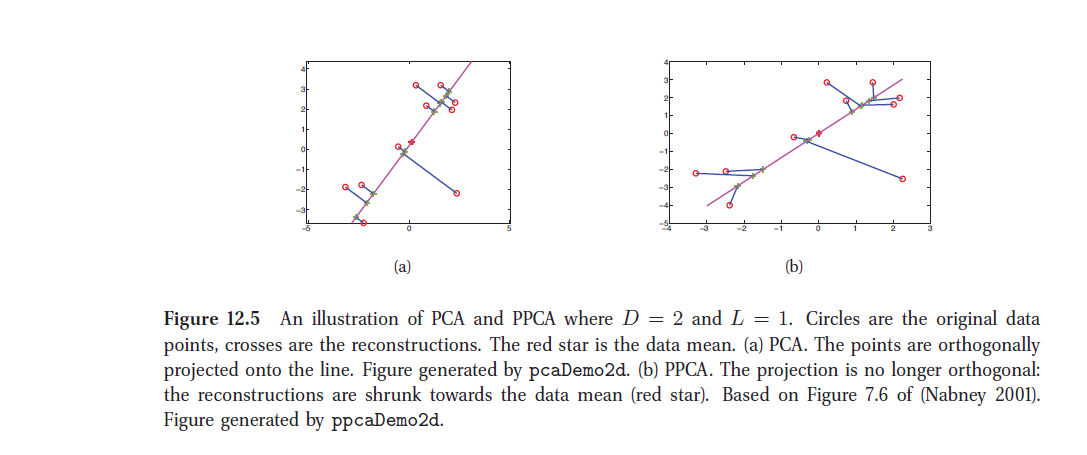

In [19]:
display_png(file="figura4.png")

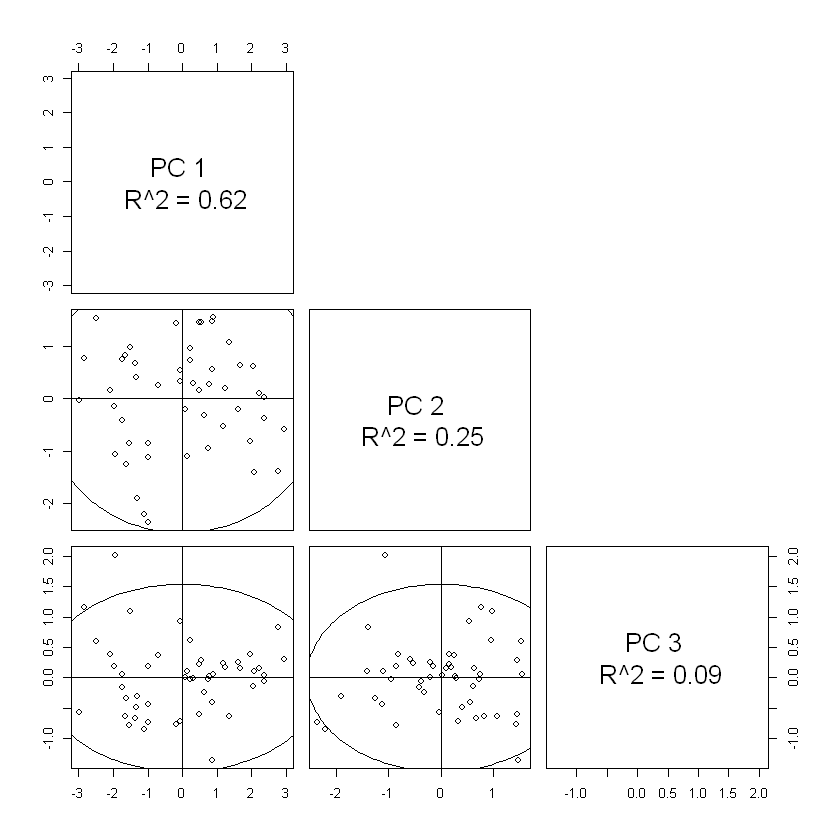

In [118]:
##if (!requireNamespace("BiocManager", quietly = TRUE))
##    install.packages("BiocManager")
##
##BiocManager::install("pcaMethods")
suppressMessages(library("pcaMethods"))
datos <- as.matrix(USArrests)
datos <- scale(datos)
result <- pca(datos, method="ppca", nPcs=3, seed=123)
## Get the estimated complete observations
cObs <- completeObs(result)
## Plot the scores
plotPcs(result, type = "scores")


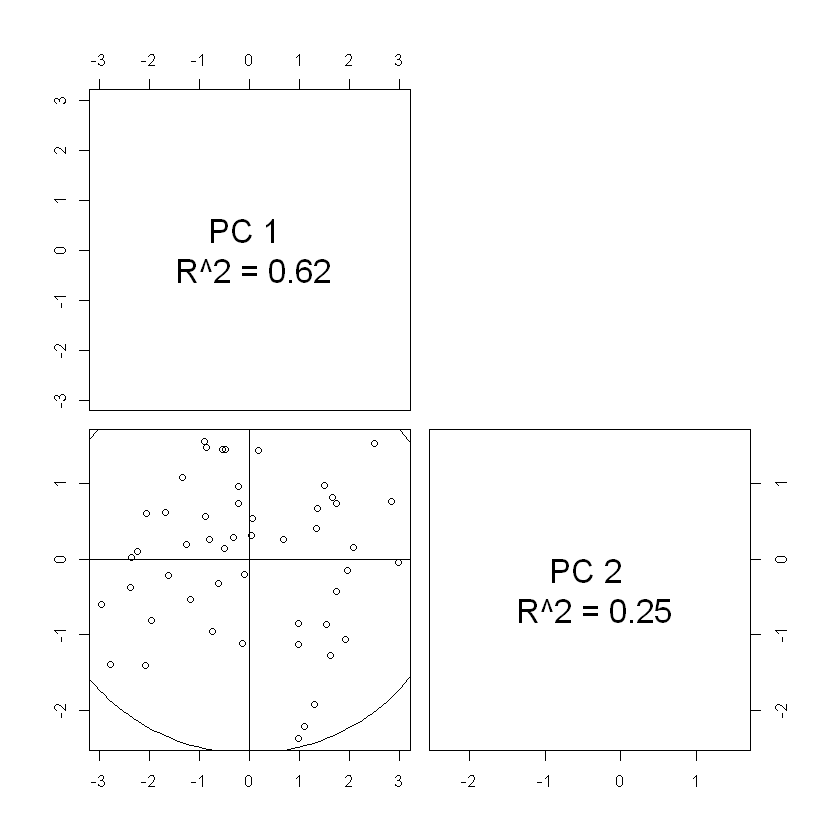

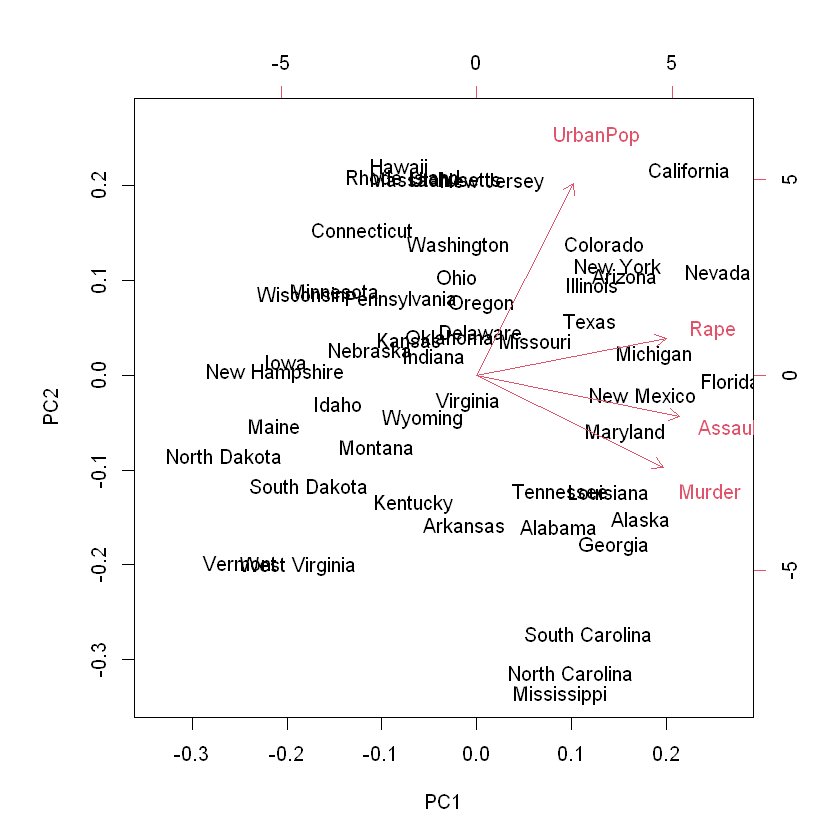

In [119]:
result <- pca(datos, method="ppca", nPcs=2, seed=123)
## Get the estimated complete observations
cObs <- completeObs(result)
## Plot the scores
plotPcs(result, type = "scores")
biplot(result)